## Project_3_Team_5

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import csv
from datetime import datetime
import pandas as pd
import pandas.util.testing as tm
from pandas_profiling import ProfileReport
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

#Database
from sqlalchemy import create_engine

C:\Users\rshan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


In [3]:
# Clock the time to run the process
start_time = datetime.now()

In [4]:
# Data files
mls_collin = "data/mls_collin.csv"

In [5]:
# Read the mouse data and the study results
mls_collin_df = pd.read_csv(mls_collin, low_memory=False)

In [6]:
mls_collin_df.head(1)

,PostalCode,NumberOfTanksAndPonds,ListingFinancing,AccessoryUnitType,AccessoryUnitYN,AcresBottomLand,AcresCultivated,AcresIrrigated,AcresPasture,AGExemptionYN,...,TransactionType,UnexemptTaxes,UnitNumber,Utilities,UtilitiesOther,WasherDryerConnections,WillSubdivide,WithdrawnDate,YearBuilt,ZeroSale
0,75071,0.0,Owner Carry First,NaN,NaN,0.0,0.5,0.0,0.0,True,...,For Sale,1400.0,NaN,"Aerobic Septic, Asphalt, City Water, Septic","Butane Gas, City Electric, Electric Avail. On ...",NaN,No,NaN,1930.0,NaN


In [7]:
# reduce columns to a more usable data set from base extract of 245 columns
mls_collin_columnreduce = mls_collin_df.iloc[: , 
[
0,19,21,28,29,30,42,48,50,72,73,105,125,126,128,135,137,142,147,153,161,167,
177,184,185,188,193,198,207,216,221,222,223,224,225,226,230,245
]].copy() 
mls_collin_columnreduce.head(1)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.0,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,NaN,988.0,N,NaN,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0


In [8]:
# Making data frame from csv file 
data = mls_collin_columnreduce

In [9]:
# Creating a bool series from isin() to reduce the dataset to only USPS zipcodes for collin county as 
# basefile had zip codes not in collin county
new = data["PostalCode"].isin(["75002","75009","75013","75023","75024","75025","75033","75034","75035",
                               "75069","75070","75071","75072","75074","75075","75078","75093","75094", 
                               "75097","75098","75121","75164","75166","75173","75189","75252","75287",                                
                               "75407","75409","75424","75442","75454"]) 

In [10]:
# Show dataframe with the new 50~ columns to compare to the above data set with 245 columns 
data.head(1)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.0,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,NaN,988.0,N,NaN,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0


In [11]:
# displaying data 
data[new] 

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.0,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,NaN,988.0,N,NaN,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.0,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,NaN,2630.0,NaN,NaN,Custer,5799,Road,Traditional,NaN,1965.0
2,75034,5.0,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,NaN,4628.0,NaN,NaN,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0
3,75078,3.1,3.0,Prosper,10/17/2012,1490000.0,1490000.0,1243.0,Prosper,Prosper,...,NaN,4614.0,E,NaN,Frontier,2380,Parkway,Victorian,"W.T. Horn Survey, A-376",1990.0
4,75002,2.0,3.0,Allen,7/10/2015,102000.0,102000.0,1135.0,Boyd,Allen,...,NaN,1260.0,NaN,NaN,Hightrail,512,Drive,Traditional,"WINDRIDGE #1 (CAL), BLK 5, LOT",1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213183,75098,2.0,4.0,Wylie,3/20/2015,173000.0,173000.0,NaN,Dodd,Wylie East,...,NaN,1936.0,NaN,NaN,Oakcrest,907,Drive,Traditional,"CREEK HOLLOW #1 (CWY), BLK E, LOT 4",2007.0
213184,75098,3.1,5.0,St. Paul,9/25/2014,400000.0,400000.0,NaN,Smith,Wylie,...,NaN,4197.0,NaN,NaN,Bayside,1105,Drive,NaN,"CASCADE COUNTRY ESTATES (CSP), BLK B, LOT 10",2005.0
213188,75252,2.1,2.0,Dallas,9/16/2014,180000.0,180000.0,NaN,Haggar,NaN,...,Plano West,1349.0,NaN,NaN,Remington Park,5735,Square,Traditional,"REMINGTON PARK (CDA), LOT 20",1984.0
213189,75252,2.0,3.0,Dallas,10/3/2014,299000.0,299000.0,NaN,Haggar,Shepton,...,Plano West,2378.0,NaN,NaN,Breakpoint,6075,Trail,Traditional,"BENT TRAIL #3 (CDA), BLK 4, LOT 13",1984.0


In [12]:
# Move data to mls variable
mls = data[new]

In [13]:
# Creating a bool series from isin() to reduce the dataset to only 5 cities
new1 = mls["City"].isin(["Frisco","Plano","McKinney","Prosper","Fairview"]) 

In [14]:
# displaying data 
mls[new1]

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.0,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,NaN,988.0,N,NaN,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.0,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,NaN,2630.0,NaN,NaN,Custer,5799,Road,Traditional,NaN,1965.0
2,75034,5.0,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,NaN,4628.0,NaN,NaN,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0
3,75078,3.1,3.0,Prosper,10/17/2012,1490000.0,1490000.0,1243.0,Prosper,Prosper,...,NaN,4614.0,E,NaN,Frontier,2380,Parkway,Victorian,"W.T. Horn Survey, A-376",1990.0
7,75034,5.1,5.0,Frisco,12/19/2013,1138000.0,1138000.0,1091.0,Smith,Frisco,...,NaN,5243.0,NaN,NaN,Briarwood,3074,Lane,Traditional,NaN,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213172,75078,3.0,5.0,Prosper,2/16/2015,327000.0,327000.0,NaN,Cynthia A Cockrell,Prosper,...,NaN,3254.0,NaN,NaN,Crescent Valley,1440,Drive,NaN,"CEDAR RIDGE ESTATES (CPR), BLK B, LOT 9",2011.0
213173,75078,3.0,5.0,Prosper,2/16/2015,327000.0,327000.0,NaN,Cynthia A Cockrell,Prosper,...,NaN,3254.0,NaN,NaN,Crescent Valley,1440,Drive,NaN,"CEDAR RIDGE ESTATES (CPR), BLK B, LOT 9",2011.0
213176,75093,2.0,4.0,Plano,3/19/2015,145000.0,145000.0,NaN,NaN,NaN,...,NaN,1828.0,NaN,NaN,Birdsong,4400,Lane,NaN,"PRESTON COVE (CPL), BLK D, LOT 1",1980.0
213177,75093,2.0,4.0,Plano,3/19/2015,145000.0,145000.0,NaN,NaN,NaN,...,NaN,1828.0,NaN,NaN,Birdsong,4400,Lane,NaN,"PRESTON COVE (CPL), BLK D, LOT 1",1980.0


In [15]:
# Move data to mls variable
mls_cz = mls[new1]

In [16]:
all_data_na = (mls_cz.isnull().sum() / len(mls_cz)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
StreetDirSuffix,99.642390
StreetDirPrefix,97.492297
SeniorHighSchoolName,62.878021
TaxLegalDescription,19.076716
Occupancy,18.442771
StreetSuffix,10.104697
ArchitecturalStyle,8.092033
SchoolDistrict,5.848104
HighSchoolName,1.142283
SellerType,0.722608


seaborn: 0.9.0


Text(0.5, 1.0, 'Percent missing data by feature')

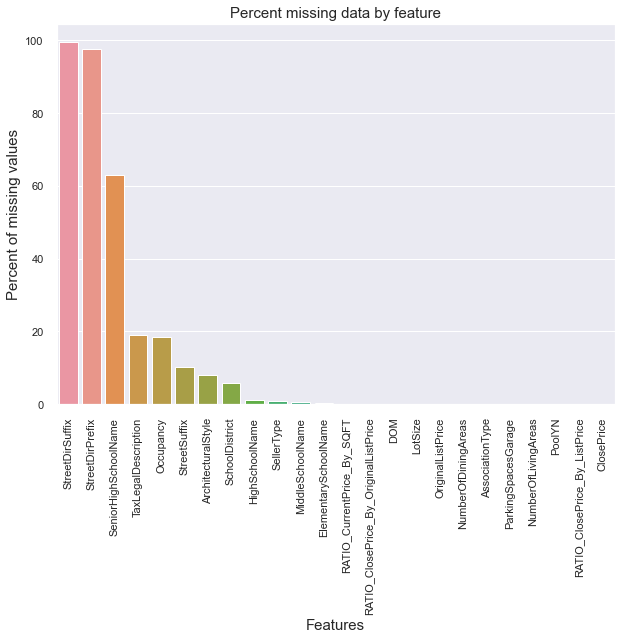

In [17]:
print('seaborn: {}'.format(sns.__version__))
sns.set(color_codes=True)

f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [18]:
mls_cz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135343 entries, 0 to 213178
Data columns (total 38 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   PostalCode                             135343 non-null  object 
 1   BathsTotal                             135343 non-null  float64
 2   BedsTotal                              135343 non-null  float64
 3   City                                   135343 non-null  object 
 4   CloseDate                              135343 non-null  object 
 5   ClosePrice                             135342 non-null  float64
 6   CurrentPrice                           135343 non-null  float64
 7   DOM                                    135320 non-null  float64
 8   ElementarySchoolName                   135125 non-null  object 
 9   HighSchoolName                         133797 non-null  object 
 10  AssociationType                        135341 non-null  

In [19]:
# reduced file prior to populating NaN fields
mls = pd.read_csv("../divergent_real_estate/data/output/mls.csv", low_memory=False)
profile=ProfileReport(mls_cz,title='Collin County RE Data Analysis - Before')
profile.to_file("../divergent_real_estate/data/output/Collin_County_RE_Data_Analysis-Before.html")

In [20]:
# Using Interpolate to populate numeric fields with a value that is more appropriate than zero.
mls_cz.interpolate(method='linear', axis=0, limit=None, inplace=True, limit_direction='forward', limit_area=None, downcast=None)

In [21]:
mls = mls_cz 

In [22]:
# Replacing nan values in AssociationType with None  
mls["AssociationType"].fillna("None", inplace = True) 
mls_fs = mls

In [23]:
# Replace remaining NaN fields across the data set with UnKnown
mls = mls_fs.replace(to_replace = np.nan, value = 'Unknown') 

In [24]:
mls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135343 entries, 0 to 213178
Data columns (total 38 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   PostalCode                             135343 non-null  object 
 1   BathsTotal                             135343 non-null  float64
 2   BedsTotal                              135343 non-null  float64
 3   City                                   135343 non-null  object 
 4   CloseDate                              135343 non-null  object 
 5   ClosePrice                             135343 non-null  float64
 6   CurrentPrice                           135343 non-null  float64
 7   DOM                                    135343 non-null  float64
 8   ElementarySchoolName                   135343 non-null  object 
 9   HighSchoolName                         135343 non-null  object 
 10  AssociationType                        135343 non-null  

In [25]:
mls.describe()

,BathsTotal,BedsTotal,ClosePrice,CurrentPrice,DOM,ListPrice,MLSNumber,NumberOfDiningAreas,NumberOfLivingAreas,NumberOfStories,OriginalListPrice,ParkingSpacesGarage,RATIO_ClosePrice_By_ListPrice,RATIO_ClosePrice_By_OriginalListPrice,RATIO_CurrentPrice_By_SQFT,SqFtTotal,YearBuilt
count,135343.000000,135343.000000,1.353430e+05,1.353430e+05,135343.000000,1.353430e+05,1.353430e+05,135343.000000,135343.000000,135343.000000,1.353430e+05,135343.000000,135343.000000,135343.000000,135343.000000,135343.000000,135343.000000
mean,2.554563,3.681262,2.821145e+05,2.821186e+05,48.979053,2.881277e+05,1.189639e+07,1.755399,2.067322,1.531258,3.027191e+05,2.121949,1.760078,15.780361,104.603385,2623.457792,1994.807061
std,0.804200,0.792419,1.925447e+05,1.925581e+05,60.370085,2.038437e+05,1.378452e+06,0.449936,0.910893,0.511945,1.491149e+06,0.609912,285.409074,1839.935998,43.231859,1019.422058,75.088998
min,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000,1.000000e+00,9.308485e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000520,0.000510,0.030000,0.000000,0.000000
25%,2.000000,3.000000,1.710000e+05,1.710000e+05,9.000000,1.749000e+05,1.075860e+07,2.000000,1.000000,1.000000,1.750000e+05,2.000000,0.966740,0.942760,80.550000,1892.000000,1988.000000
50%,2.100000,4.000000,2.400000e+05,2.400000e+05,28.000000,2.440000e+05,1.171055e+07,2.000000,2.000000,2.000000,2.480000e+05,2.000000,0.985080,0.973980,96.700000,2413.000000,1997.000000
75%,3.100000,4.000000,3.310000e+05,3.310000e+05,67.000000,3.390000e+05,1.327572e+07,2.000000,3.000000,2.000000,3.450000e+05,2.000000,1.000000,1.000000,124.000000,3186.000000,2003.000000
max,9.300000,42.000000,6.547500e+06,6.547500e+06,1649.000000,6.750000e+06,1.432068e+07,9.000000,9.000000,5.000000,4.300000e+08,9.000000,105000.000000,378000.000000,10000.000000,17306.000000,9999.000000


In [26]:
# generate univariate observations
data=mls['BathsTotal']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['BathsTotal'])))

mean=2.555 stdv=0.804


In [27]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(0.1419712952524157, 4.9671544075899625)

In [28]:
mls.loc[mls.BathsTotal<=lower,"BathsTotal"]=mean1
mls.loc[mls.BathsTotal>=upper,"BathsTotal"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [29]:
#mls.BathsTotal=mls[mls.BathsTotal<=lower].replace(mean(mls.BathsTotal))

In [30]:
# generate univariate observations
data=mls['BedsTotal']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['BedsTotal'])))

mean=3.681 stdv=0.792


In [31]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(1.304014392059932, 6.058508974497629)

In [32]:
mls.loc[mls.BedsTotal<=lower,"BedsTotal"]=mean1
mls.loc[mls.BedsTotal>=upper,"BedsTotal"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [33]:
# generate univariate observations
data=mls['OriginalListPrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['OriginalListPrice'])))

mean=302719.084 stdv=1491143.274


In [34]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-4170710.73711418, 4776148.905863211)

In [35]:
mls.loc[mls.ListPrice<=lower,"OriginalListPrice"]=mean1
mls.loc[mls.ListPrice>=upper,"OriginalListPrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [36]:
# generate univariate observations
data=mls['ListPrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['ListPrice'])))

mean=288127.665 stdv=203842.967


In [37]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-323401.2343519081, 899656.5653110268)

In [38]:
mls.loc[mls.ListPrice<=lower,"ListPrice"]=mean1
mls.loc[mls.ListPrice>=upper,"ListPrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [39]:
# generate univariate observations
data=mls['ClosePrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['ClosePrice'])))

mean=282114.541 stdv=192544.024


In [40]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-295517.531106292, 859746.6125033351)

In [41]:
mls.loc[mls.ClosePrice<=lower,"ClosePrice"]=mean1
mls.loc[mls.ClosePrice>=upper,"ClosePrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,1649.0,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,1649.0,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,1324.0,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [42]:
# generate univariate observations
data=mls['DOM']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['DOM'])))

mean=48.979 stdv=60.370


In [43]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-132.13053223952065, 230.0886386801936)

In [44]:
mls.loc[mls.DOM<=lower,"DOM"]=mean1
mls.loc[mls.DOM>=upper,"DOM"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [45]:
# generate univariate observations
data=mls['SqFtTotal']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['SqFtTotal'])))

mean=2623.458 stdv=1019.418


In [46]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-434.7970821697454, 5681.712667017133)

In [47]:
mls.loc[mls.SqFtTotal<=lower,"SqFtTotal"]=mean1
mls.loc[mls.SqFtTotal>=upper,"SqFtTotal"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [48]:
# generate univariate observations
data=mls['CurrentPrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['CurrentPrice'])))

mean=282118.573 stdv=192557.427


In [49]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-295553.7074322843, 859790.8535242139)

In [50]:
mls.loc[mls.CurrentPrice<=lower,"CurrentPrice"]=mean1
mls.loc[mls.CurrentPrice>=upper,"CurrentPrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [51]:
# generate univariate observations
data=mls['NumberOfDiningAreas']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['NumberOfDiningAreas'])))

mean=1.755 stdv=0.450


In [52]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(0.4055954396631365, 3.10520305009991)

In [53]:
mls.loc[mls.NumberOfDiningAreas<=lower,"NumberOfDiningAreas"]=mean1
mls.loc[mls.NumberOfDiningAreas>=upper,"NumberOfDiningAreas"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [54]:
# generate univariate observations
data=mls['NumberOfLivingAreas']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['NumberOfLivingAreas'])))

mean=2.067 stdv=0.911


In [55]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-0.665348157573074, 4.799991249568967)

In [56]:
mls.loc[mls.NumberOfLivingAreas<=lower,"NumberOfLivingAreas"]=mean1
mls.loc[mls.NumberOfLivingAreas>=upper,"NumberOfLivingAreas"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [57]:
# generate univariate observations
data=mls['NumberOfStories']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['NumberOfStories'])))

mean=1.531 stdv=0.512


In [58]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-0.004572647120727913, 3.0670878861800066)

In [59]:
mls.loc[mls.NumberOfStories<=lower,"NumberOfStories"]=mean1
mls.loc[mls.NumberOfStories>=upper,"NumberOfStories"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [60]:
# generate univariate observations
data=mls['ParkingSpacesGarage']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['ParkingSpacesGarage'])))

mean=2.122 stdv=0.610


In [61]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(0.29222025091329185, 3.951678583899)

In [62]:
mls.loc[mls.ParkingSpacesGarage<=lower,"ParkingSpacesGarage"]=mean1
mls.loc[mls.ParkingSpacesGarage>=upper,"ParkingSpacesGarage"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [63]:
# generate univariate observations
data=mls['YearBuilt']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['YearBuilt'])))

mean=1994.807 stdv=75.089


In [64]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(1769.540898836099, 2220.0732223227346)

In [65]:
mls.loc[mls.YearBuilt<=lower,"YearBuilt"]=mean1
mls.loc[mls.YearBuilt>=upper,"YearBuilt"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [66]:
# generate univariate observations
data=mls['RATIO_ClosePrice_By_ListPrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['RATIO_ClosePrice_By_ListPrice'])))

mean=1.760 stdv=285.408


In [67]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-854.4639807536975, 857.984137353152)

In [68]:
mls.loc[mls.RATIO_ClosePrice_By_ListPrice<=lower,"RATIO_ClosePrice_By_ListPrice"]=mean1
mls.loc[mls.RATIO_ClosePrice_By_ListPrice>=upper,"RATIO_ClosePrice_By_ListPrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [69]:
# generate univariate observations
data=mls['RATIO_ClosePrice_By_OriginalListPrice']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['RATIO_ClosePrice_By_OriginalListPrice'])))

mean=15.780 stdv=1839.929


In [70]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-5504.007242491993, 5535.56796362083)

In [71]:
mls.loc[mls.RATIO_ClosePrice_By_OriginalListPrice<=lower,"RATIO_ClosePrice_By_OriginalListPrice"]=mean1
mls.loc[mls.RATIO_ClosePrice_By_OriginalListPrice>=upper,"RATIO_ClosePrice_By_OriginalListPrice"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [72]:
# generate univariate observations
data=mls['RATIO_CurrentPrice_By_SQFT']
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(mls['RATIO_CurrentPrice_By_SQFT'])))

mean=104.603 stdv=43.232


In [73]:
data_mean, data_std= mean(data), std(data)
cut_off=data_std*3
lower,upper=data_mean-cut_off, data_mean+cut_off
mean1=mean(data)
lower,upper

(-25.091711706403345, 234.29848213413285)

In [74]:
mls.loc[mls.RATIO_CurrentPrice_By_SQFT <=lower,"RATIO_CurrentPrice_By_SQFT"]=mean1
mls.loc[mls.RATIO_CurrentPrice_By_SQFT >=upper,"RATIO_CurrentPrice_By_SQFT"]=mean1
mls.head(3)

,PostalCode,BathsTotal,BedsTotal,City,CloseDate,ClosePrice,CurrentPrice,DOM,ElementarySchoolName,HighSchoolName,...,SeniorHighSchoolName,SqFtTotal,StreetDirPrefix,StreetDirSuffix,StreetName,StreetNumber,StreetSuffix,ArchitecturalStyle,TaxLegalDescription,YearBuilt
0,75071,1.000000,2.0,McKinney,10/3/2014,150000.0,150000.0,48.979053,John A Baker,Prosper,...,Unknown,988.0,N,Unknown,Custer,5841,Road,Early American,"Abstract A0412 Horn, George, T",1930.0
1,75071,3.000000,4.0,McKinney,10/3/2014,400000.0,400000.0,48.979053,John A Baker,Prosper,...,Unknown,2630.0,Unknown,Unknown,Custer,5799,Road,Traditional,Unknown,1965.0
2,75034,2.554563,5.0,Frisco,7/29/2013,555000.0,555000.0,48.979053,Spears,Frisco,...,Unknown,4628.0,Unknown,Unknown,Lago Vista,5507,Lane,Traditional,"Starwood #04 Village #15, Bloc",2004.0


In [75]:
all_data_na = (mls.isnull().sum() / len(mls)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


In [76]:
# sorting by first name 
mls.sort_values("MLSNumber", inplace = True) 
  
# dropping ALL duplicte values 
mls.drop_duplicates(subset ="MLSNumber", keep = 'first', inplace = True) 
  
# displaying data 
mls.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124901 entries, 138 to 196886
Data columns (total 38 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   PostalCode                             124901 non-null  object 
 1   BathsTotal                             124901 non-null  float64
 2   BedsTotal                              124901 non-null  float64
 3   City                                   124901 non-null  object 
 4   CloseDate                              124901 non-null  object 
 5   ClosePrice                             124901 non-null  float64
 6   CurrentPrice                           124901 non-null  float64
 7   DOM                                    124901 non-null  float64
 8   ElementarySchoolName                   124901 non-null  object 
 9   HighSchoolName                         124901 non-null  object 
 10  AssociationType                        124901 non-null

In [77]:
# Move data frame to csv file that will be input into postgres DB
mls.to_csv("../divergent_real_estate/data/output/mls.csv", index=False, header=True)

In [78]:
#import the packages 
mls = pd.read_csv("../divergent_real_estate/data/output/mls.csv", low_memory=False)
profile=ProfileReport(mls,title='Collin County RE Data Analysis - After')
profile.to_file("../divergent_real_estate/data/output/Collin_County_RE_Data_Analysis-After.html")

In [79]:
# generating one row  
rows = mls.sample(frac =.10) 
  
# checking if sample is 0.10 times data or not 
if (0.10*(len(data))== len(rows)): 
    print( "Cool") 
    print(len(data), len(rows)) 

In [80]:
# Move data frame to csv file that will be input into postgres DB
rows.to_csv("../divergent_real_estate/data/output/mls_sample_10.csv", index=False, header=True)

In [81]:
# Provides start, end and elapsed time to run the program.
end_time = datetime.now()
print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-05-28 15:16:38.354011
End time 2020-05-28 15:26:10.520627
Time elapsed 0:09:32.166616


In [ ]:
#Database Load

In [ ]:
# Clock the time to run the process
start_time = datetime.now()

In [ ]:
#connect to a local db
rds_connection_string = "postgres:postgres@localhost:5432/real_estate_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
engine.table_names()

In [ ]:
mls.to_sql(name='real_estate_tbl', con=engine, if_exists='append', index=False)

In [ ]:
pd.read_sql_query('select * from real_estate_tbl', con=engine).head()

In [ ]:
pd.read_sql_query('select count(*) from real_estate_tbl ', con=engine).head()

In [ ]:
# Provides start, end and elapsed time to run the program.
end_time = datetime.now()
print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)